<a href="https://colab.research.google.com/github/gayatri-bagusetty-34/Deep-Learning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RNN on Tesla Dataset**

Tesla Stock Dataset from 2010 to 2021
Date:
Represents the date at which the share is traded in the stock market.

Open:
Represents the opening price of the stock at a particular date.
It is the price at which a stock started trading when the opening bell rang.

Close:
Represents the closing price of the stock at a particular date.
It is the last buy-sell order executed between two traders.
The closing price is the raw price, which is just the cash value of the last transacted price before the market closes.

High:
The high is the highest price at which a stock is traded during a period. Here the period is a day.

Low:
The low is the lowest price at which a stock is traded during a period. Here the period is a day.

Adj Close:
The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions.
The adjusted closing price factors in corporate actions, such as stock splits, dividends, and rights offerings.

Volume:
Volume is the number of shares of security traded during a given period of time.
Here the security is stock and the period of time is a day.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 3.8095e-04 - val_loss: 0.0122
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 3.8627e-06 - val_loss: 0.0127
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.6130e-06 - val_loss: 0.0164
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.5369e-06 - val_loss: 0.0156
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 4.7337e-06 - val_loss: 0.0209
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 4.7034e-06 - val_loss: 0.0221
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 3.7671e-06 - val_loss: 0.0225
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 3.3462e-06 - val_loss: 0.0238
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 2.7893e-06 - val_loss: 0.0234
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 4.6058e-06 - val_loss: 0.0271
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.9668e-06 - val_loss: 0.0281
Epoch 12/20
70/70 ━

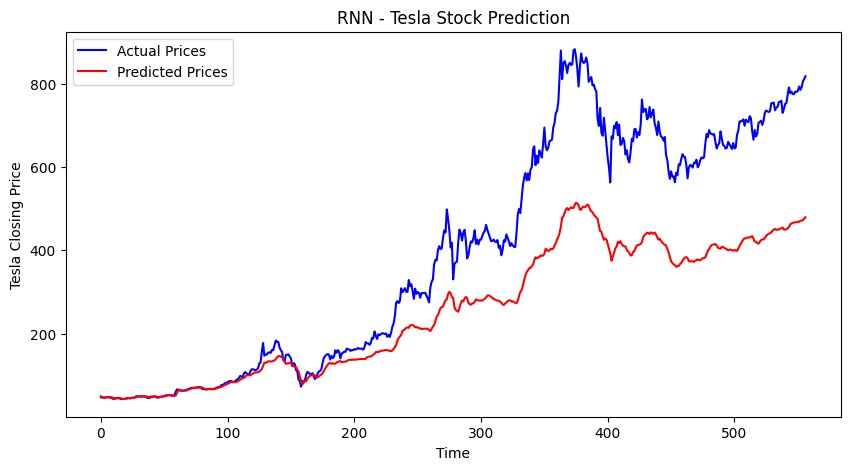

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/TSLA.csv"
df = pd.read_csv(file_path)

data = df[['Close']].values  # Select only the closing price

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])   # Past 60 days
        y.append(data[i+seq_length, 0])  # Predict next closing price
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, seq_length=60)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(60, 1)),
    tf.keras.layers.SimpleRNN(50, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1)  # Output single value (predicted closing price)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

y_pred_rescaled = scaler.inverse_transform(np.column_stack((y_pred,)))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.column_stack((y_test,)))[:, 0]

plt.figure(figsize=(10,5))
plt.plot(y_test_rescaled, label="Actual Prices", color='blue')
plt.plot(y_pred_rescaled, label="Predicted Prices", color='red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Tesla Closing Price")
plt.title("RNN - Tesla Stock Prediction")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute errors
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 34687.5966
Mean Absolute Error (MAE): 139.3938
Root Mean Squared Error (RMSE): 186.2461
R² Score: 0.5464
